In [84]:
import pandas as pd
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [85]:
# cargamos el dataframe

df = pd.read_pickle('../datos/clima_2002-2022.pkl')

In [86]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [87]:
df.head()

,City,Latitude,Longitude,Date,Month,Year,Season,Precipitation_(mm),Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
1,Elche,38.2851,-0.5625,2002-01-01,January,2002,winter,0,13.9,12.7,12.2,12.8,8.5,5.0,94.0,75.9,62.0,37.0,25.1,19.3,1023,1023,1019
2,Elche,38.2851,-0.5625,2002-01-02,January,2002,winter,0,13.9,12.7,10.0,11.1,8.8,7.2,82.0,76.7,67.0,40.2,23.0,4.8,1023,1019,1019
3,Elche,38.2851,-0.5625,2002-01-03,January,2002,winter,0,13.9,11.6,8.9,11.1,8.8,7.2,94.0,83.8,72.0,14.5,5.6,0.0,1019,1016,1013
4,Elche,38.2851,-0.5625,2002-01-04,January,2002,winter,0,15.0,12.5,8.9,11.1,8.7,6.1,94.0,77.6,63.0,29.0,12.9,3.2,1023,1016,1013
5,Elche,38.2851,-0.5625,2002-01-05,January,2002,winter,0,13.9,13.0,12.2,11.1,7.3,5.0,88.0,68.2,58.0,27.4,23.3,9.7,1029,1026,1023


In [88]:
print(f"En el dataframe hay {df.shape[0]} filas y {df.shape[1]} columnas.")
print(".............................................")    
print(f"5 filas aleatorias:")
display(df.sample(5))
print(".............................................")
print(f"Los tipos de data por columna del dataframe son:")
display(df.dtypes.reset_index())
print(".............................................")
print(f"La cantidad de nulos por columna del dataframe son:")
display(df.isnull().sum().reset_index())
print(".............................................")
print(f"El porcentaje de nulos por columna del dataframe son:")
display(df.isnull().sum() * 100 / df.shape[0])
print(".............................................")
if df.duplicated().sum() != 0:
    print(f"En el dataframe hay {df.duplicated().sum()} filas duplicadas.")
else:
    print(f"No hay filas duplicadas.")
print(".............................................")
print(f"Los principales estadísticos de las columnas numéricas son:")
display(df.describe())
print(".............................................")
print(f"Los principales estadísticos de las columnas categóricas son:")
display(df.describe(include=object))
print(".............................................")

En el dataframe hay 30626 filas y 23 columnas.
.............................................
5 filas aleatorias:


,City,Latitude,Longitude,Date,Month,Year,Season,Precipitation_(mm),Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
13,Adelaide,-34.9462,138.5312,2002-09-13,September,2002,winter,0,22.2,18.6,15.0,5.0,3.0,-1.1,51.0,36.5,23.0,20.9,12.6,0.0,1023,1019,1019
18,Helsinki,60.3179,24.9496,2017-07-18,July,2017,summer,0,18.9,14.7,7.8,11.1,8.4,6.1,100.0,68.8,43.0,25.7,15.0,1.6,1006,1002,1002
28,Helsinki,60.3179,24.9496,2020-04-28,April,2020,spring,0,7.2,3.8,1.1,0.0,-3.1,-7.8,87.0,63.8,36.0,19.3,10.1,0.0,1002,999,996
15,Helsinki,60.3179,24.9496,2002-01-15,January,2002,winter,0,2.2,2.1,1.1,1.1,0.6,-17.8,100.0,93.7,93.0,25.7,17.4,9.7,1009,1006,1006
7,Adelaide,-34.9462,138.5312,2007-02-07,February,2007,summer,0,23.9,18.1,13.9,10.0,8.0,6.1,77.0,54.0,31.0,33.8,19.5,9.7,1016,1013,1013


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,City,object
1,Latitude,float64
2,Longitude,float64
3,Date,datetime64[ns]
4,Month,object
5,Year,object
6,Season,object
7,Precipitation_(mm),int64
8,Temperature_(°C)_Max,float64
9,Temperature_(°C)_Avg,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,City,0
1,Latitude,0
2,Longitude,0
3,Date,0
4,Month,0
5,Year,0
6,Season,0
7,Precipitation_(mm),0
8,Temperature_(°C)_Max,0
9,Temperature_(°C)_Avg,0


.............................................
El porcentaje de nulos por columna del dataframe son:


City                    0.0
Latitude                0.0
Longitude               0.0
Date                    0.0
Month                   0.0
Year                    0.0
Season                  0.0
Precipitation_(mm)      0.0
Temperature_(°C)_Max    0.0
Temperature_(°C)_Avg    0.0
Temperature_(°C)_Min    0.0
Dew_Point_(°C)_Max      0.0
Dew_Point_(°C)_Avg      0.0
Dew_Point_(°C)_Min      0.0
Humidity_(%)_Max        0.0
Humidity_(%)_Avg        0.0
Humidity_(%)_Min        0.0
Wind_Speed_(kph)_Max    0.0
Wind_Speed_(kph)_Avg    0.0
Wind_Speed_(kph)_Min    0.0
Pressure_(hPa)_Max      0.0
Pressure_(hPa)_Avg      0.0
Pressure_(hPa)_Min      0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,Latitude,Longitude,Precipitation_(mm),Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
count,30626.000000,30626.000000,30626.0,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000
mean,27.201958,21.819266,0.0,16.559626,11.973891,6.862734,9.041641,5.299376,-0.363750,87.932606,68.282495,44.745086,25.978714,14.294554,4.002769,1012.483543,993.192190,920.779305
std,36.796136,76.949102,0.0,10.858540,10.229154,10.897973,8.791037,9.209479,11.685268,12.062833,15.191163,22.647013,12.835092,6.264235,5.035200,15.785218,66.987708,281.998053
min,-34.946200,-75.668200,0.0,-25.000000,-27.200000,-31.100000,-32.200000,-33.200000,-37.200000,18.000000,7.300000,0.000000,4.800000,0.800000,0.000000,972.000000,339.000000,0.000000
25%,-34.946200,-75.668200,0.0,11.100000,6.300000,1.100000,3.900000,-0.300000,-11.100000,82.000000,58.300000,31.000000,19.300000,9.700000,0.000000,1006.000000,1002.000000,999.000000
50%,45.320200,-0.562500,0.0,17.800000,13.800000,8.900000,11.100000,7.200000,2.800000,93.000000,68.900000,46.000000,24.100000,13.400000,1.600000,1013.000000,1009.000000,1006.000000
75%,45.320200,138.531200,0.0,23.900000,19.100000,13.900000,15.000000,11.600000,7.800000,100.000000,79.300000,59.000000,32.200000,17.900000,8.000000,1019.000000,1016.000000,1013.000000
max,60.317900,138.531200,0.0,50.000000,38.500000,33.900000,96.100000,24.600000,23.900000,100.000000,100.000000,100.000000,1311.600000,66.500000,33.800000,1917.000000,1050.000000,1046.000000


.............................................
Los principales estadísticos de las columnas categóricas son:


,City,Month,Year,Season
count,30626,30626,30626,30626
unique,4,12,21,4
top,Ottawa,March,2006,spring
freq,7675,2609,1465,7707


.............................................


In [89]:
# como no hay valores de precipitacion, eliminamos esa columna

df.drop(['Precipitation_(mm)'], axis=1, inplace=True)

Duplicados

In [90]:
# comprobamos si tenemos algunos registros duplicados

df.duplicated(subset=['City', 'Date']).sum()

9

In [91]:
# eliminamos los registros duplicados

df.drop_duplicates(subset=['City', 'Date'], inplace=True, ignore_index=True)

Outliers

In [92]:
df_num = df.select_dtypes(include=['float', 'int'])
df_num.head()

,Latitude,Longitude,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
0,38.2851,-0.5625,13.9,12.7,12.2,12.8,8.5,5.0,94.0,75.9,62.0,37.0,25.1,19.3,1023,1023,1019
1,38.2851,-0.5625,13.9,12.7,10.0,11.1,8.8,7.2,82.0,76.7,67.0,40.2,23.0,4.8,1023,1019,1019
2,38.2851,-0.5625,13.9,11.6,8.9,11.1,8.8,7.2,94.0,83.8,72.0,14.5,5.6,0.0,1019,1016,1013
3,38.2851,-0.5625,15.0,12.5,8.9,11.1,8.7,6.1,94.0,77.6,63.0,29.0,12.9,3.2,1023,1016,1013
4,38.2851,-0.5625,13.9,13.0,12.2,11.1,7.3,5.0,88.0,68.2,58.0,27.4,23.3,9.7,1029,1026,1023


In [93]:
df_num.columns

Index(['Latitude', 'Longitude', 'Temperature_(°C)_Max', 'Temperature_(°C)_Avg',
       'Temperature_(°C)_Min', 'Dew_Point_(°C)_Max', 'Dew_Point_(°C)_Avg',
       'Dew_Point_(°C)_Min', 'Humidity_(%)_Max', 'Humidity_(%)_Avg',
       'Humidity_(%)_Min', 'Wind_Speed_(kph)_Max', 'Wind_Speed_(kph)_Avg',
       'Wind_Speed_(kph)_Min', 'Pressure_(hPa)_Max', 'Pressure_(hPa)_Avg',
       'Pressure_(hPa)_Min'],
      dtype='object')

In [94]:
df_num.drop(['Latitude', 'Longitude'], inplace=True, axis=1)

In [95]:
for i in df_num.columns:
    print(i)

Temperature_(°C)_Max
Temperature_(°C)_Avg
Temperature_(°C)_Min
Dew_Point_(°C)_Max
Dew_Point_(°C)_Avg
Dew_Point_(°C)_Min
Humidity_(%)_Max
Humidity_(%)_Avg
Humidity_(%)_Min
Wind_Speed_(kph)_Max
Wind_Speed_(kph)_Avg
Wind_Speed_(kph)_Min
Pressure_(hPa)_Max
Pressure_(hPa)_Avg
Pressure_(hPa)_Min


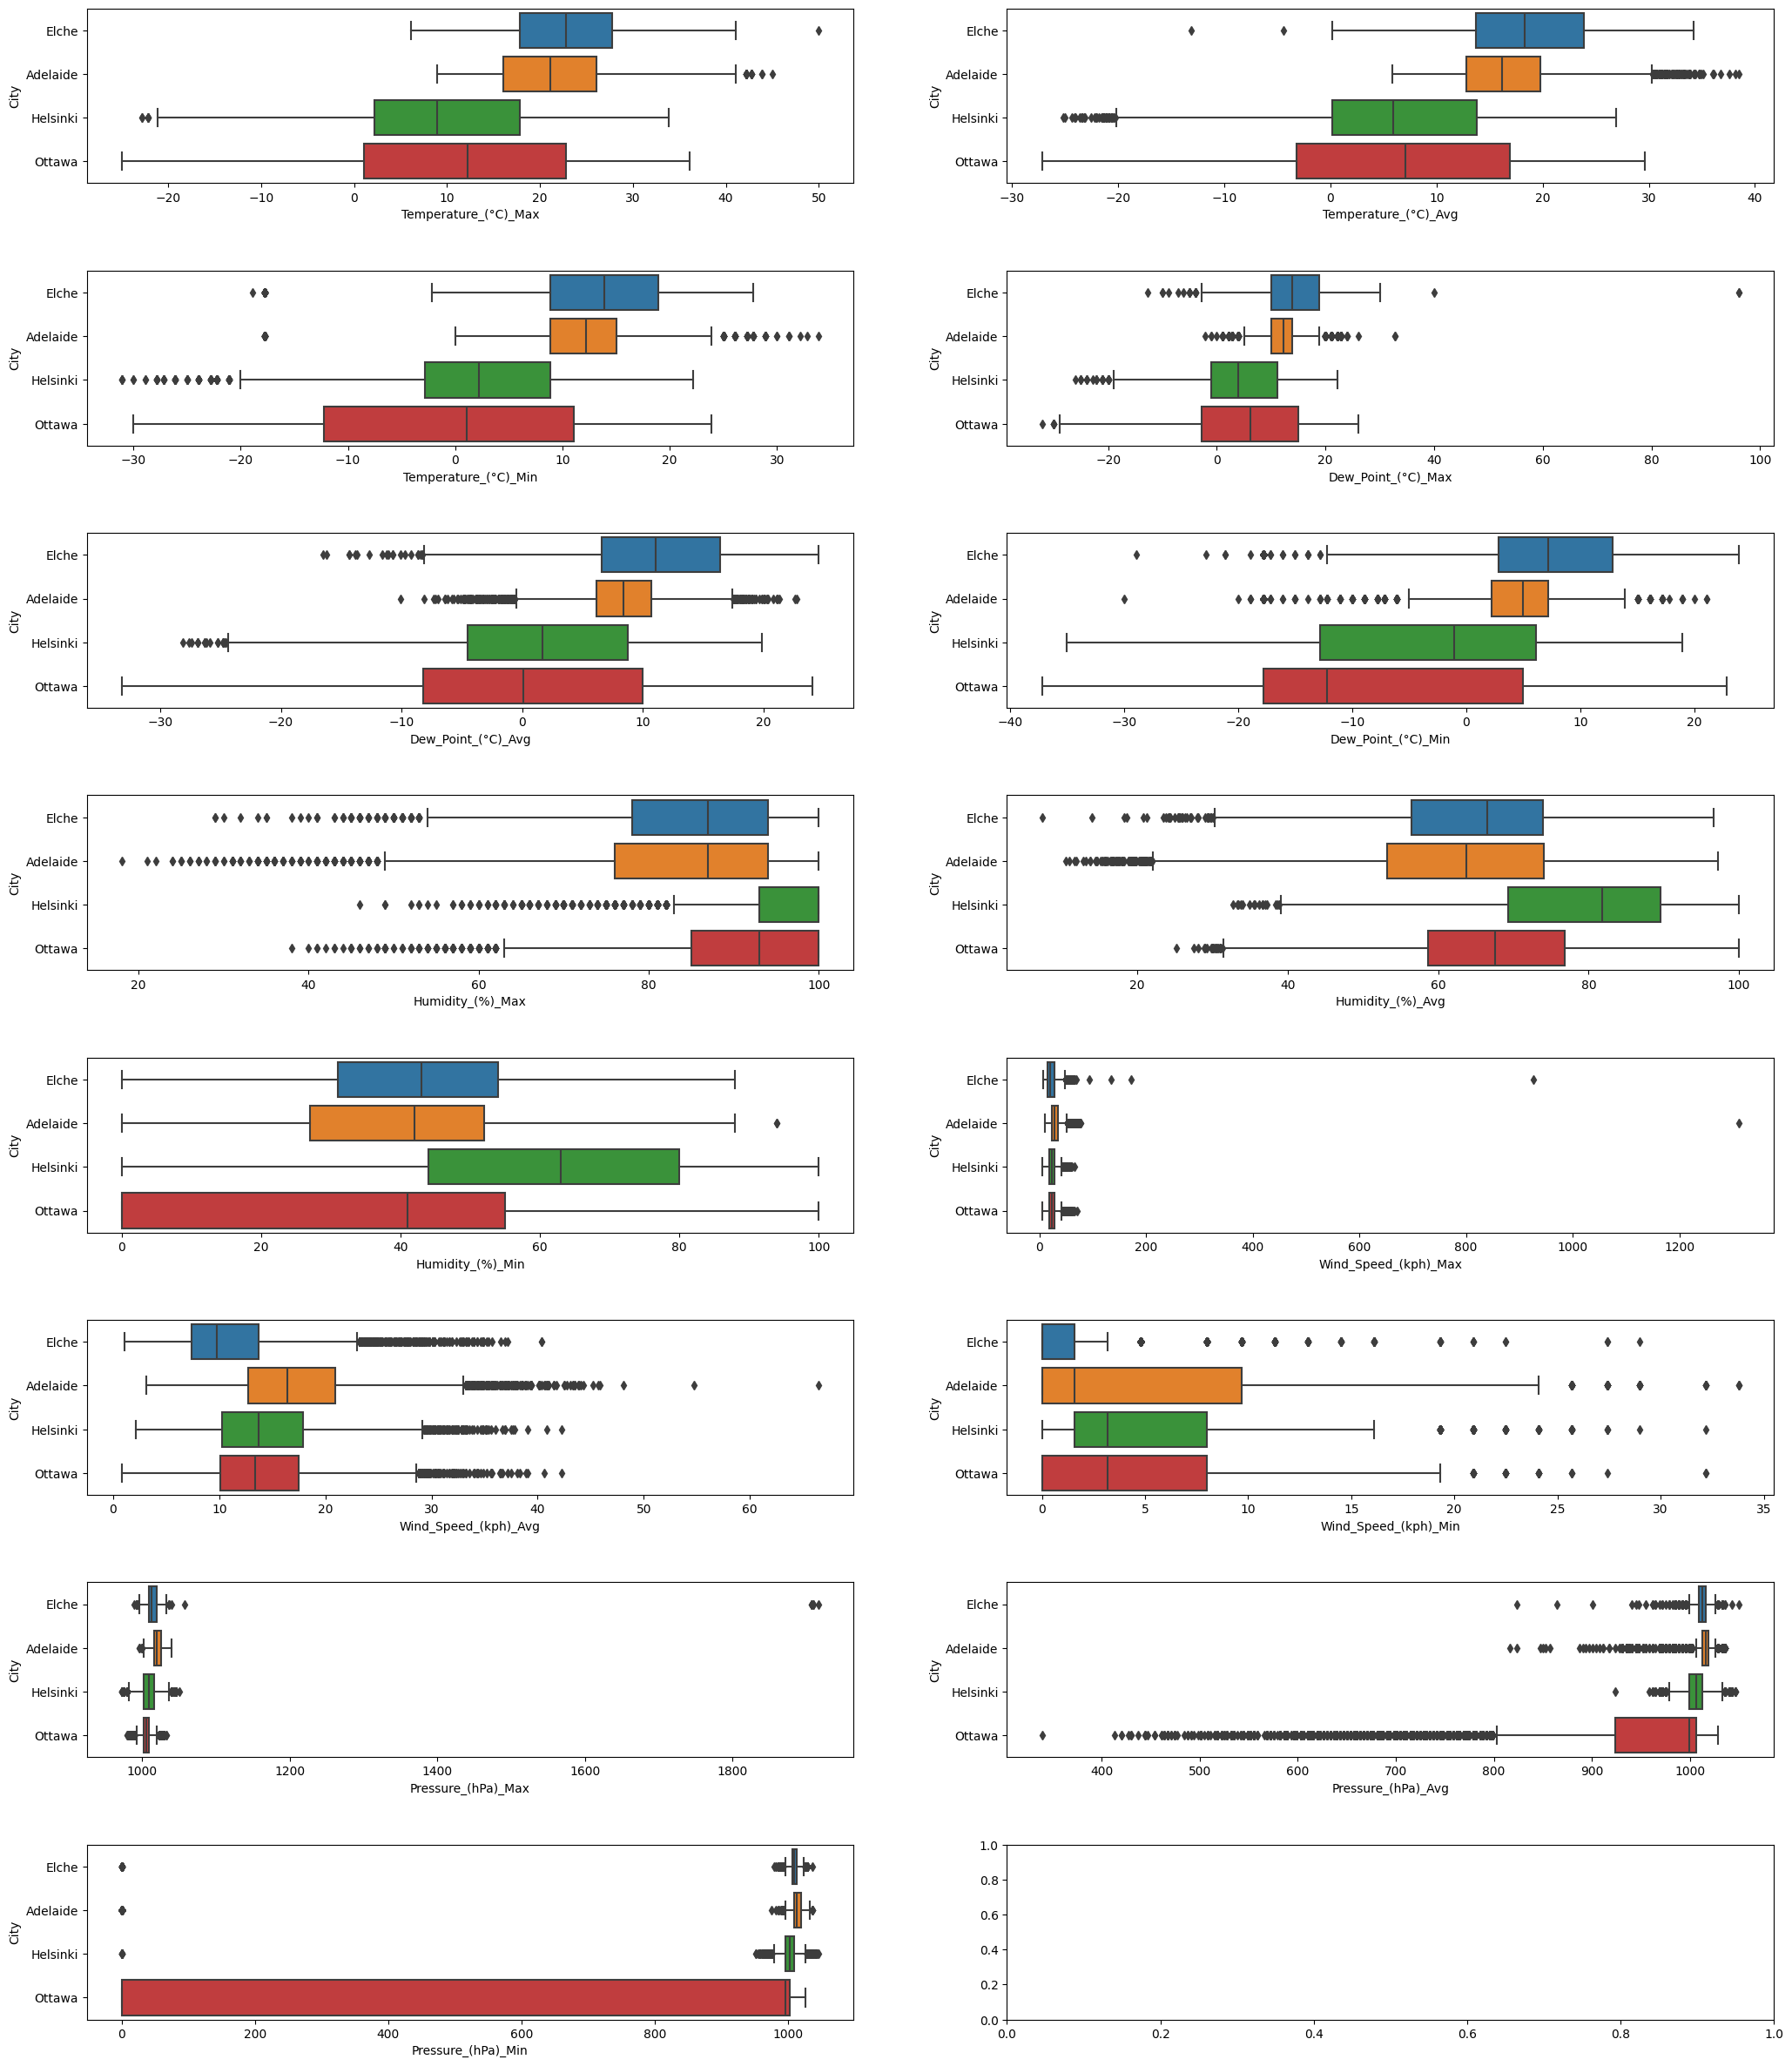

In [96]:
fig, axes = plt.subplots(8,2, figsize = (25,30))
axes = axes.flatten()

fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, col in enumerate(df_num.columns):
    fig = sns.boxplot(x = col, data = df, y = 'City', ax = axes[i])

Analysis:

- Max Temperature anomaly for Elche - 50 degrees is incorrect
- Avg and Min Temperature anomaly for Elche - temperatures well below zero are incorrect
- other temperature outliers are within ranges possible for those locations
- Max Dew Point - anomaly for Elche - value close to 100 not possible for Dew Point
- outliers for Avg and Min Dew Point - not enough is known about this measure to evaluate if accurate or not. As this measure will not be used in analysis, these columns will be deleted.
- Humidity - outliers appear to be within possible ranges
- Wind Speed - max wind speeds of over 800kph are not possible. Values of over 100kph in Elche may be incorrect as well.
- Pressure - values should be around 1000hPa; value of over 1800hPa is incorrect. Min pressure and Avg Pressure appear to include many incorrect values for Ottawa. As this measure will not be used in analysis, these columns will be deleted.

In [97]:
# imprimimos los nombres de las columnas

df.columns

Index(['City', 'Latitude', 'Longitude', 'Date', 'Month', 'Year', 'Season',
       'Temperature_(°C)_Max', 'Temperature_(°C)_Avg', 'Temperature_(°C)_Min',
       'Dew_Point_(°C)_Max', 'Dew_Point_(°C)_Avg', 'Dew_Point_(°C)_Min',
       'Humidity_(%)_Max', 'Humidity_(%)_Avg', 'Humidity_(%)_Min',
       'Wind_Speed_(kph)_Max', 'Wind_Speed_(kph)_Avg', 'Wind_Speed_(kph)_Min',
       'Pressure_(hPa)_Max', 'Pressure_(hPa)_Avg', 'Pressure_(hPa)_Min'],
      dtype='object')

In [98]:
# averiguamos las indices

df.index

RangeIndex(start=0, stop=30617, step=1)

In [99]:
# creamos una indice de valores unicos

df.reset_index(inplace=True)

df.index

RangeIndex(start=0, stop=30617, step=1)

In [100]:
# borramos la antigua indice

df.drop(['index'], inplace=True, axis=1)

In [101]:
df.head()

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
0,Elche,38.2851,-0.5625,2002-01-01,January,2002,winter,13.9,12.7,12.2,12.8,8.5,5.0,94.0,75.9,62.0,37.0,25.1,19.3,1023,1023,1019
1,Elche,38.2851,-0.5625,2002-01-02,January,2002,winter,13.9,12.7,10.0,11.1,8.8,7.2,82.0,76.7,67.0,40.2,23.0,4.8,1023,1019,1019
2,Elche,38.2851,-0.5625,2002-01-03,January,2002,winter,13.9,11.6,8.9,11.1,8.8,7.2,94.0,83.8,72.0,14.5,5.6,0.0,1019,1016,1013
3,Elche,38.2851,-0.5625,2002-01-04,January,2002,winter,15.0,12.5,8.9,11.1,8.7,6.1,94.0,77.6,63.0,29.0,12.9,3.2,1023,1016,1013
4,Elche,38.2851,-0.5625,2002-01-05,January,2002,winter,13.9,13.0,12.2,11.1,7.3,5.0,88.0,68.2,58.0,27.4,23.3,9.7,1029,1026,1023


In [102]:
# encontramos el valor incorrecto de temperature maxima

df[(df['Temperature_(°C)_Max'] == 50)]


,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
4277,Elche,38.2851,-0.5625,2013-10-18,October,2013,autumn,50.0,23.2,17.8,40.0,18.7,13.9,94.0,76.5,59.0,12.9,4.5,0.0,1013,1009,1009


In [103]:
# como solo hay un registro, cambiamos el valor incorrecto por un valor obtenido de los datos de AEMET

df.iloc[4277,7] = 28.9

In [104]:
# comprobamos que se ha cambiado

df[(df['Temperature_(°C)_Max'] == 50)]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min


In [105]:
# buscamos los outliers de temperatura minima

df.loc[(df['Temperature_(°C)_Min'] < -10) & ((df['City'] == 'Elche') | (df['City'] == 'Adelaide'))]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
10,Elche,38.2851,-0.5625,2002-01-11,January,2002,winter,15.0,10.2,-17.8,8.9,6.4,-17.8,87.0,75.5,0.0,12.9,6.8,0.0,1029,1029,1029
18,Elche,38.2851,-0.5625,2002-01-19,January,2002,winter,16.1,9.5,-17.8,7.2,4.5,-17.8,87.0,70.7,0.0,16.1,9.7,1.6,1023,999,0
38,Elche,38.2851,-0.5625,2002-02-08,February,2002,winter,17.2,9.8,-17.8,23.9,1.6,-17.8,100.0,59.6,0.0,16.1,6.9,0.0,1026,1026,1023
40,Elche,38.2851,-0.5625,2002-02-10,February,2002,winter,22.2,13.0,-17.8,11.1,6.9,-17.8,87.0,67.0,0.0,27.4,8.4,0.0,1019,1019,1016
53,Elche,38.2851,-0.5625,2002-02-23,February,2002,winter,22.2,11.4,-17.8,11.1,4.3,-17.8,87.0,63.1,0.0,16.1,10.6,0.0,1019,1016,1016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470,Adelaide,-34.9462,138.5312,2012-06-28,June,2012,winter,16.1,12.2,-17.8,11.1,6.6,-17.8,94.0,68.6,0.0,46.7,25.6,14.5,1016,1009,1006
13723,Adelaide,-34.9462,138.5312,2018-08-29,August,2018,winter,26.1,21.5,-17.8,3.9,-4.8,-17.8,33.0,16.9,0.0,46.7,34.1,24.1,1013,992,0
14641,Adelaide,-34.9462,138.5312,2021-03-04,March,2021,summer,22.8,17.0,-17.8,12.8,9.5,-17.8,82.0,61.3,0.0,33.8,16.3,0.0,1019,1016,1016
14740,Adelaide,-34.9462,138.5312,2021-06-11,June,2021,autumn,16.1,13.6,-17.8,12.2,8.9,-17.8,94.0,73.3,0.0,20.9,10.5,0.0,1019,972,0


In [106]:
# creamos una lista de las indices de los outliers

lista_outliers_min_temp = df.loc[(df['Temperature_(°C)_Min'] < -10) & ((df['City'] == 'Elche') | (df['City'] == 'Adelaide'))].index
lista_outliers_min_temp

Int64Index([   10,    18,    38,    40,    53,    66,   100,   101,   107,
              139,
            ...
             8954,  9020,  9206,  9946, 10673, 11470, 13723, 14641, 14740,
            15048],
           dtype='int64', length=187)

In [107]:
# iteramos por la lista de los indices para cambiar los valores a nulos

for i in lista_outliers_min_temp:
    df.iloc[i,9] = np.nan

In [108]:
# comprobamos que haya funcionado

df.loc[(df['Temperature_(°C)_Min'] < -10) & ((df['City'] == 'Elche') | (df['City'] == 'Adelaide'))]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min


In [109]:
# buscamos los outliers de temperatura media

df.loc[(df['Temperature_(°C)_Avg'] < 5) & (df['City'] == 'Elche')]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
1090,Elche,38.2851,-0.5625,2005-01-26,January,2005,winter,8.9,4.9,2.2,-12.8,-16.5,-21.1,30.0,20.8,11.0,35.4,20.0,9.7,1009,1006,1002
1091,Elche,38.2851,-0.5625,2005-01-27,January,2005,winter,8.9,3.1,-2.2,-7.2,-13.7,-18.9,52.0,30.5,13.0,19.3,10.8,1.6,1009,1006,1006
1092,Elche,38.2851,-0.5625,2005-01-28,January,2005,winter,10.0,3.9,0.0,-8.9,-14.3,-17.2,51.0,28.0,14.0,35.4,19.5,3.2,1013,1009,1009
1457,Elche,38.2851,-0.5625,2006-01-28,January,2006,winter,6.1,4.3,2.8,2.8,-1.0,-17.8,87.0,82.0,65.0,20.9,10.9,1.6,1006,1002,999
1458,Elche,38.2851,-0.5625,2006-01-29,January,2006,winter,10.0,4.5,-1.1,1.1,-8.6,-17.8,81.0,58.9,32.0,20.9,9.3,0.0,1009,1006,1006
1642,Elche,38.2851,-0.5625,2006-08-01,August,2006,summer,32.8,1.4,NaN,22.8,-2.2,-17.8,74.0,23.5,0.0,24.1,9.5,0.0,1009,1009,1006
1942,Elche,38.2851,-0.5625,2007-05-28,May,2007,spring,22.8,0.6,NaN,7.2,-7.3,-17.8,46.0,18.2,0.0,38.6,19.6,0.0,1009,1006,1002
1944,Elche,38.2851,-0.5625,2007-05-30,May,2007,spring,22.8,-13.1,NaN,11.1,-14.3,-17.8,64.0,7.3,0.0,29.0,10.0,0.0,1009,1009,1006
1945,Elche,38.2851,-0.5625,2007-05-31,May,2007,spring,31.1,0.2,NaN,15.0,-7.1,-17.8,61.0,13.9,0.0,25.7,14.2,0.0,1009,1006,1006
2463,Elche,38.2851,-0.5625,2008-10-30,October,2008,autumn,18.9,-4.4,NaN,7.2,-9.2,-17.8,82.0,24.1,0.0,27.4,9.7,0.0,1009,1002,999


Hay varios valores de temperatura media que no tienen sentido dado las fechas y las temperaturas máximas. Entonces vamos a buscar los valores donde hay una gran diferencia entre la máxima y la media para buscar más errores.

In [110]:
df.loc[((df['Temperature_(°C)_Max'] - df['Temperature_(°C)_Avg']) > 13) & (df['City'] == 'Elche')]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
1263,Elche,38.2851,-0.5625,2005-07-18,July,2005,summer,33.9,19.6,NaN,22.2,8.1,-17.8,83.0,36.8,0.0,24.1,12.1,0.0,1013,1009,1006
1641,Elche,38.2851,-0.5625,2006-07-31,July,2006,summer,36.1,15.8,NaN,21.1,5.8,-17.8,74.0,34.3,0.0,14.5,8.4,0.0,1009,1009,1006
1642,Elche,38.2851,-0.5625,2006-08-01,August,2006,summer,32.8,1.4,NaN,22.8,-2.2,-17.8,74.0,23.5,0.0,24.1,9.5,0.0,1009,1009,1006
1909,Elche,38.2851,-0.5625,2007-04-25,April,2007,spring,23.9,10.4,NaN,12.8,3.5,-17.8,77.0,49.6,0.0,14.5,4.8,0.0,1013,1009,999
1932,Elche,38.2851,-0.5625,2007-05-18,May,2007,spring,27.2,8.0,NaN,15.0,0.4,-17.8,73.0,31.1,0.0,14.5,5.0,0.0,1013,1009,1009
1939,Elche,38.2851,-0.5625,2007-05-25,May,2007,spring,27.2,13.4,NaN,17.2,4.2,-17.8,83.0,37.5,0.0,45.1,13.8,0.0,1006,1002,1002
1942,Elche,38.2851,-0.5625,2007-05-28,May,2007,spring,22.8,0.6,NaN,7.2,-7.3,-17.8,46.0,18.2,0.0,38.6,19.6,0.0,1009,1006,1002
1944,Elche,38.2851,-0.5625,2007-05-30,May,2007,spring,22.8,-13.1,NaN,11.1,-14.3,-17.8,64.0,7.3,0.0,29.0,10.0,0.0,1009,1009,1006
1945,Elche,38.2851,-0.5625,2007-05-31,May,2007,spring,31.1,0.2,NaN,15.0,-7.1,-17.8,61.0,13.9,0.0,25.7,14.2,0.0,1009,1006,1006
2463,Elche,38.2851,-0.5625,2008-10-30,October,2008,autumn,18.9,-4.4,NaN,7.2,-9.2,-17.8,82.0,24.1,0.0,27.4,9.7,0.0,1009,1002,999


Despues de probar varios valores, usando 13 grado como umbral parece devolver los datos que parecen que son los más probables de ser errores. Podemos ver que todos estos registros tenían errores de temperatura mínima tambien.

In [111]:
# creamos una lista de las indices de los outliers

lista_outliers_avg_temp = df.loc[((df['Temperature_(°C)_Max'] - df['Temperature_(°C)_Avg']) > 13) & (df['City'] == 'Elche')].index
lista_outliers_avg_temp

Int64Index([1263, 1641, 1642, 1909, 1932, 1939, 1942, 1944, 1945, 2463], dtype='int64')

In [112]:
# iteramos por la lista de los indices para cambiar los valores a nulos

for i in lista_outliers_avg_temp:
    df.iloc[i,8] = np.nan

In [113]:
# comprobamos que haya funcionado

df.loc[((df['Temperature_(°C)_Max'] - df['Temperature_(°C)_Avg']) > 13) & (df['City'] == 'Elche')]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min


In [114]:
# eliminamos las columnas de dew point, minimum pressure y average pressure

df.drop(['Dew_Point_(°C)_Max', 'Dew_Point_(°C)_Avg', 'Dew_Point_(°C)_Min', 'Pressure_(hPa)_Avg', 'Pressure_(hPa)_Min'], axis=1, inplace=True)

In [115]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Date', 'Month', 'Year', 'Season',
       'Temperature_(°C)_Max', 'Temperature_(°C)_Avg', 'Temperature_(°C)_Min',
       'Humidity_(%)_Max', 'Humidity_(%)_Avg', 'Humidity_(%)_Min',
       'Wind_Speed_(kph)_Max', 'Wind_Speed_(kph)_Avg', 'Wind_Speed_(kph)_Min',
       'Pressure_(hPa)_Max'],
      dtype='object')

In [116]:
# buscamos los outliers de velocidad máxima del viento

df.loc[(df['Wind_Speed_(kph)_Max'] > 100)]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max
204,Elche,38.2851,-0.5625,2002-07-24,July,2002,summer,28.9,26.3,23.9,69.0,57.5,39.0,172.2,13.7,0.0,1016
668,Elche,38.2851,-0.5625,2003-10-31,October,2003,autumn,20.0,14.4,11.1,82.0,68.4,55.0,135.2,18.5,1.6,999
5355,Elche,38.2851,-0.5625,2016-09-30,September,2016,autumn,26.1,22.2,17.8,83.0,68.9,51.0,925.4,31.2,3.2,1016
8319,Adelaide,-34.9462,138.5312,2003-11-12,November,2003,spring,26.1,19.9,13.9,63.0,45.5,24.0,1311.6,66.5,0.0,1023


In [117]:
# creamos una lista de las indices de los outliers

lista_outliers_max_viento = df.loc[(df['Wind_Speed_(kph)_Max'] > 100)].index
lista_outliers_max_viento

Int64Index([204, 668, 5355, 8319], dtype='int64')

In [118]:
# iteramos por la lista de los indices para cambiar los valores a nulos

for i in lista_outliers_max_viento:
    df.iloc[i,13] = np.nan

In [119]:
# comprobamos que haya funcionado

df.loc[(df['Wind_Speed_(kph)_Max'] > 100)]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max


In [120]:
# buscamos los outliers de presión atmosférica

df.loc[(df['Pressure_(hPa)_Max'] > 1100)]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max
30,Elche,38.2851,-0.5625,2002-01-31,January,2002,winter,18.9,13.2,7.2,93.0,59.7,32.0,37.0,16.3,4.8,1917
160,Elche,38.2851,-0.5625,2002-06-10,June,2002,spring,26.1,21.2,NaN,78.0,48.1,0.0,20.9,12.7,3.2,1907
165,Elche,38.2851,-0.5625,2002-06-15,June,2002,spring,28.9,23.3,15.0,65.0,45.0,25.0,29.0,14.8,1.6,1910
186,Elche,38.2851,-0.5625,2002-07-06,July,2002,summer,27.2,21.7,NaN,88.0,71.8,0.0,22.5,10.5,1.6,1907
241,Elche,38.2851,-0.5625,2002-08-30,August,2002,summer,28.9,24.8,20.0,88.0,70.1,51.0,14.5,6.0,0.0,1910
247,Elche,38.2851,-0.5625,2002-09-05,September,2002,summer,32.8,26.6,21.1,69.0,43.4,21.0,25.7,13.4,3.2,1907


In [121]:
# creamos una lista de las indices de los outliers

lista_outliers_presion = df.loc[(df['Pressure_(hPa)_Max'] > 1100)].index
lista_outliers_presion

Int64Index([30, 160, 165, 186, 241, 247], dtype='int64')

In [122]:
# iteramos por la lista de los indices para cambiar los valores a nulos

for i in lista_outliers_presion:
    df.iloc[i,16] = np.nan

Imputacion de nulos

In [123]:
df_num = df.select_dtypes(include=['float', 'int'])
df_num.head()

,Latitude,Longitude,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max
0,38.2851,-0.5625,13.9,12.7,12.2,94.0,75.9,62.0,37.0,25.1,19.3,1023.0
1,38.2851,-0.5625,13.9,12.7,10.0,82.0,76.7,67.0,40.2,23.0,4.8,1023.0
2,38.2851,-0.5625,13.9,11.6,8.9,94.0,83.8,72.0,14.5,5.6,0.0,1019.0
3,38.2851,-0.5625,15.0,12.5,8.9,94.0,77.6,63.0,29.0,12.9,3.2,1023.0
4,38.2851,-0.5625,13.9,13.0,12.2,88.0,68.2,58.0,27.4,23.3,9.7,1029.0


In [124]:
imputer = IterativeImputer(n_nearest_features = 12)

imputer.fit(df_num)

df_datos_transformados = pd.DataFrame(imputer.transform(df_num), columns = df_num.columns)

In [125]:
df[df_datos_transformados.columns]

,Latitude,Longitude,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max
0,38.2851,-0.5625,13.9,12.7,12.2,94.0,75.9,62.0,37.0,25.1,19.3,1023.0
1,38.2851,-0.5625,13.9,12.7,10.0,82.0,76.7,67.0,40.2,23.0,4.8,1023.0
2,38.2851,-0.5625,13.9,11.6,8.9,94.0,83.8,72.0,14.5,5.6,0.0,1019.0
3,38.2851,-0.5625,15.0,12.5,8.9,94.0,77.6,63.0,29.0,12.9,3.2,1023.0
4,38.2851,-0.5625,13.9,13.0,12.2,88.0,68.2,58.0,27.4,23.3,9.7,1029.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30612,45.3202,-75.6682,-3.9,-6.8,-10.0,93.0,80.5,69.0,25.7,12.1,3.2,1009.0
30613,45.3202,-75.6682,0.0,-2.6,-5.0,100.0,92.7,80.0,20.9,11.9,4.8,1006.0
30614,45.3202,-75.6682,7.2,2.6,-3.9,93.0,80.8,61.0,25.7,12.9,8.0,1006.0
30615,45.3202,-75.6682,10.0,7.3,6.1,100.0,92.6,76.0,20.9,13.7,3.2,1006.0


In [126]:
# sustituimos los datos transformados en el dataframe

df[df_datos_transformados.columns] = df_datos_transformados

In [127]:
# comprobamos si tenemos nulos

df.isnull().sum()

City                    0
Latitude                0
Longitude               0
Date                    0
Month                   0
Year                    0
Season                  0
Temperature_(°C)_Max    0
Temperature_(°C)_Avg    0
Temperature_(°C)_Min    0
Humidity_(%)_Max        0
Humidity_(%)_Avg        0
Humidity_(%)_Min        0
Wind_Speed_(kph)_Max    0
Wind_Speed_(kph)_Avg    0
Wind_Speed_(kph)_Min    0
Pressure_(hPa)_Max      0
dtype: int64

In [128]:
# examinamos una selección de los nulos imputados

df.loc[lista_outliers_min_temp , :]

,City,Latitude,Longitude,Date,Month,Year,Season,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max
10,Elche,38.2851,-0.5625,2002-01-11,January,2002,winter,15.0,10.2,2.414215,87.0,75.5,0.0,12.9,6.8,0.0,1029.0
18,Elche,38.2851,-0.5625,2002-01-19,January,2002,winter,16.1,9.5,0.362819,87.0,70.7,0.0,16.1,9.7,1.6,1023.0
38,Elche,38.2851,-0.5625,2002-02-08,February,2002,winter,17.2,9.8,-0.020930,100.0,59.6,0.0,16.1,6.9,0.0,1026.0
40,Elche,38.2851,-0.5625,2002-02-10,February,2002,winter,22.2,13.0,2.184976,87.0,67.0,0.0,27.4,8.4,0.0,1019.0
53,Elche,38.2851,-0.5625,2002-02-23,February,2002,winter,22.2,11.4,-1.125860,87.0,63.1,0.0,16.1,10.6,0.0,1019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470,Adelaide,-34.9462,138.5312,2012-06-28,June,2012,winter,16.1,12.2,6.893020,94.0,68.6,0.0,46.7,25.6,14.5,1016.0
13723,Adelaide,-34.9462,138.5312,2018-08-29,August,2018,winter,26.1,21.5,17.816490,33.0,16.9,0.0,46.7,34.1,24.1,1013.0
14641,Adelaide,-34.9462,138.5312,2021-03-04,March,2021,summer,22.8,17.0,10.025159,82.0,61.3,0.0,33.8,16.3,0.0,1019.0
14740,Adelaide,-34.9462,138.5312,2021-06-11,June,2021,autumn,16.1,13.6,8.648974,94.0,73.3,0.0,20.9,10.5,0.0,1019.0


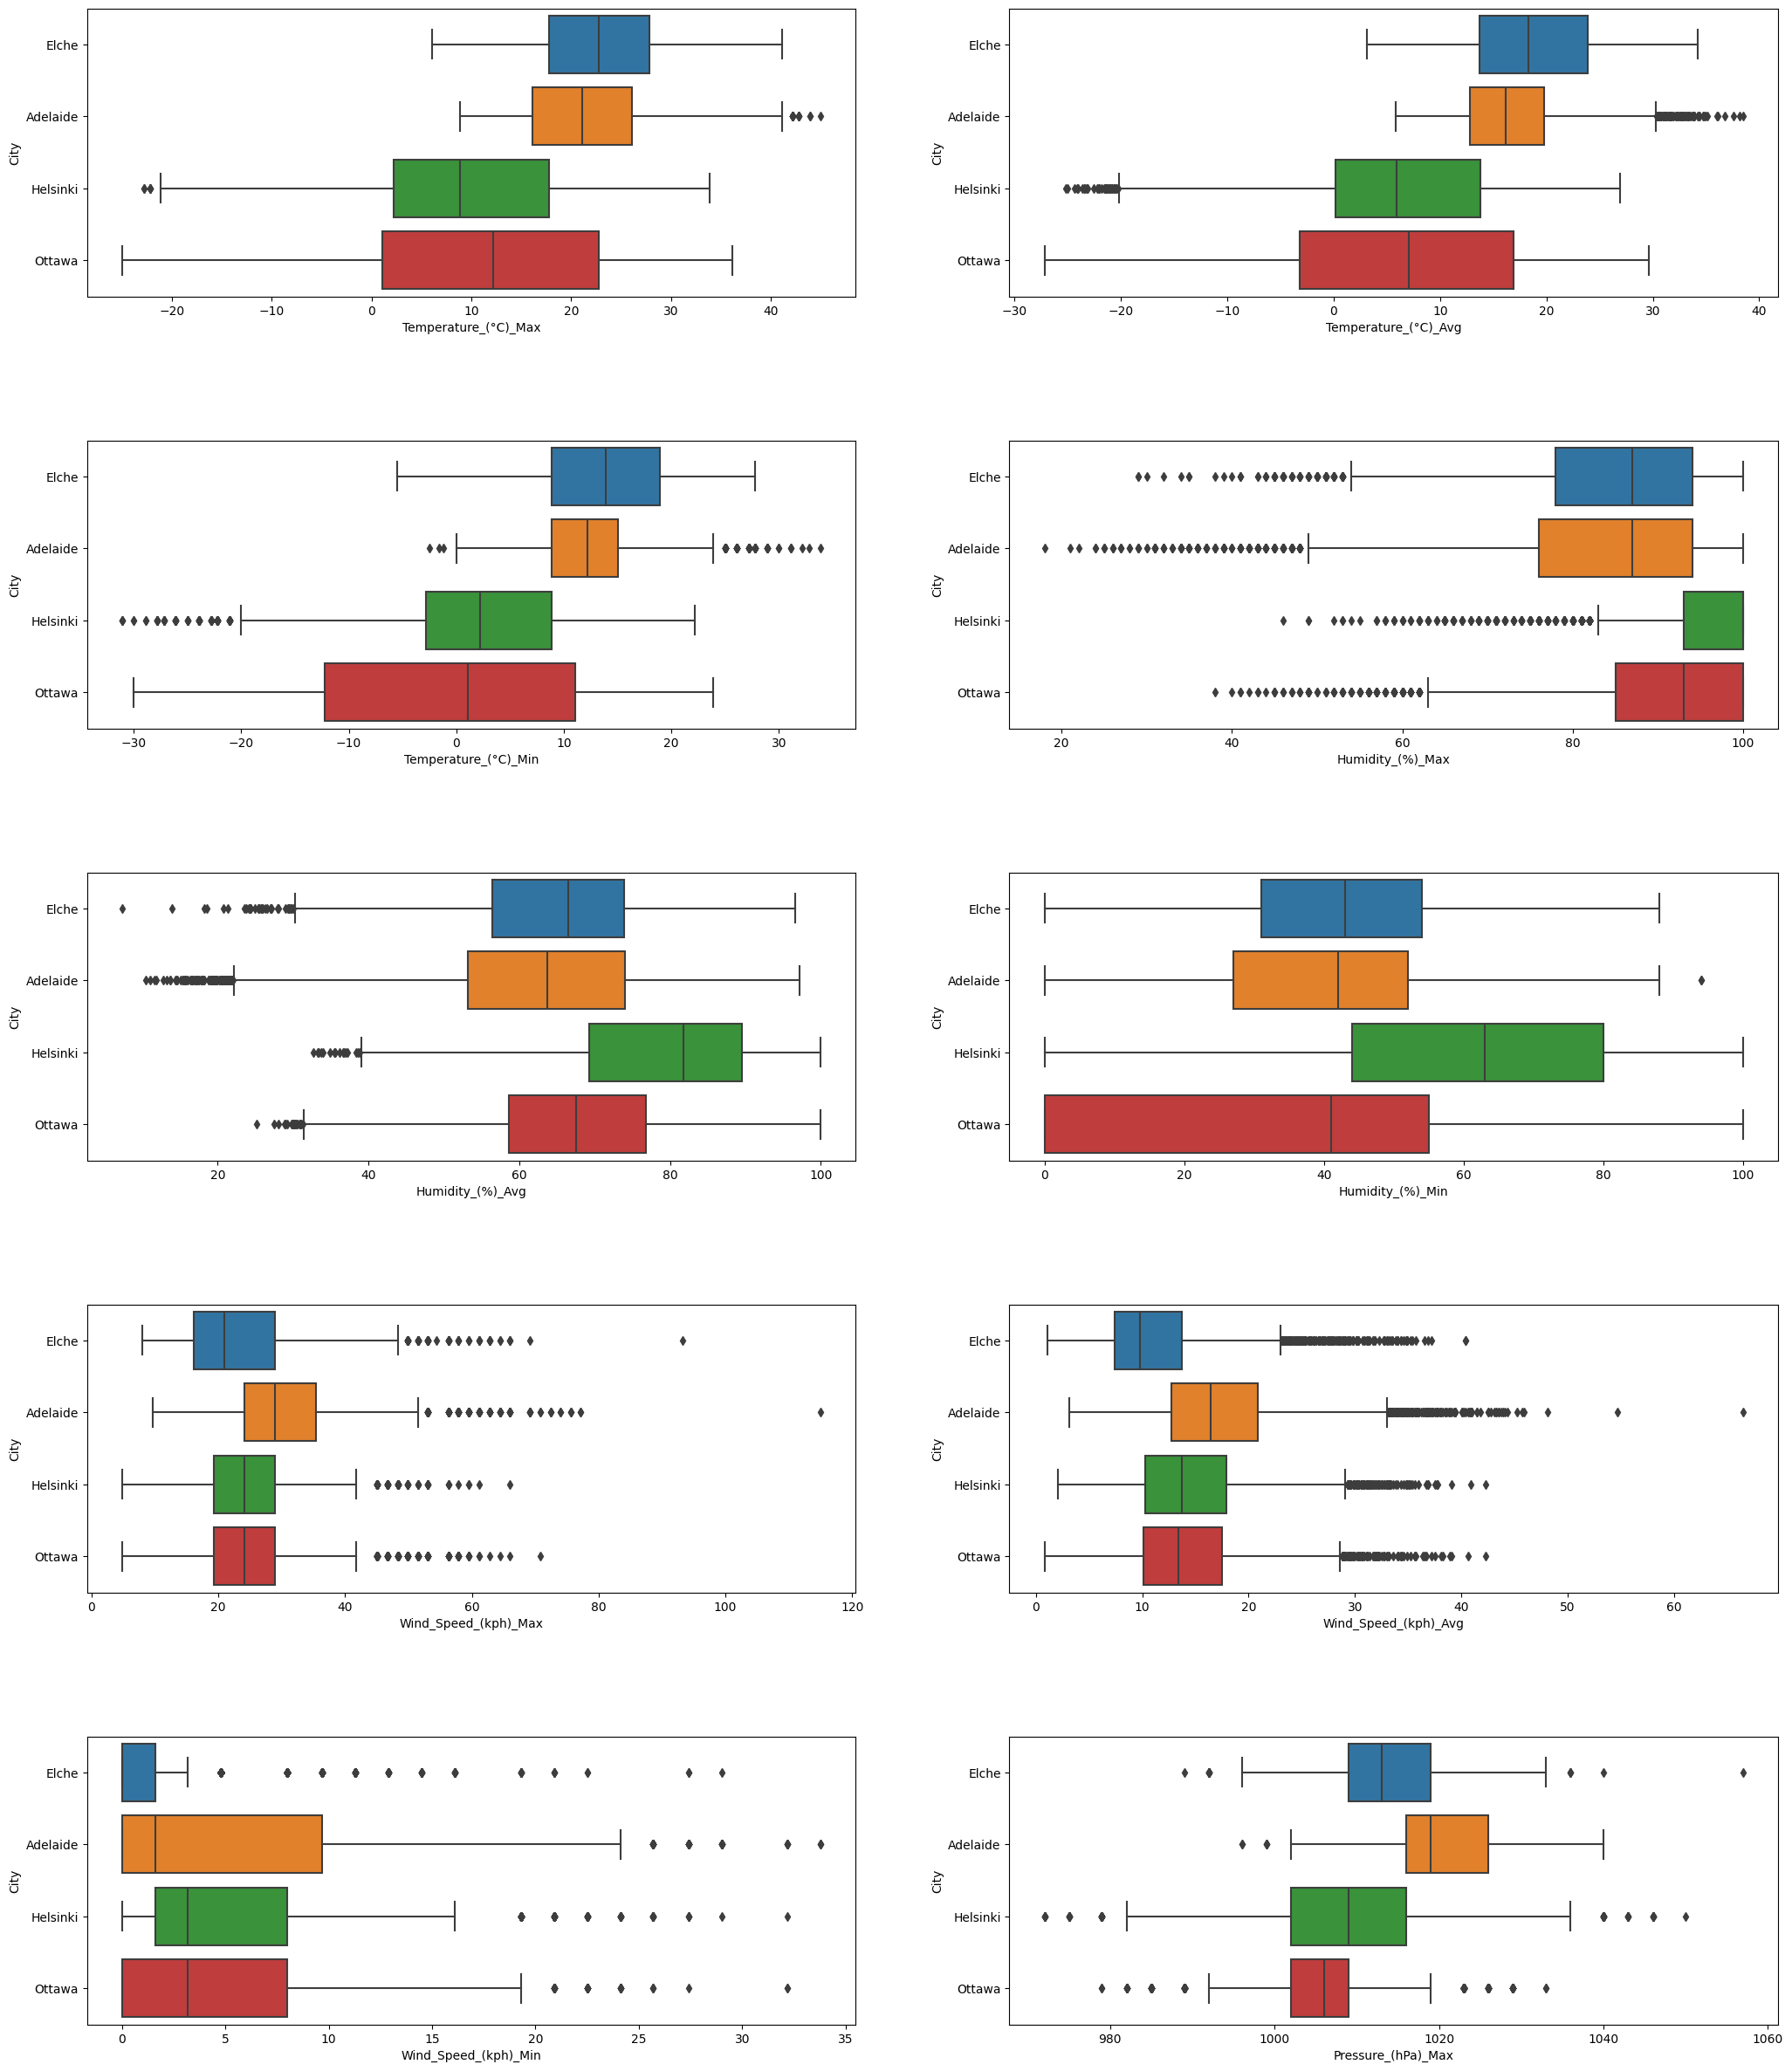

In [129]:
# volvemos a crear los boxplots para comprobar si nos quedan datos raros

df_num.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

fig, axes = plt.subplots(5,2, figsize = (25,30))
axes = axes.flatten()

fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, col in enumerate(df_num.columns):
    fig = sns.boxplot(x = col, data = df, y = 'City', ax = axes[i])

In [135]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Date', 'Month', 'Year', 'Season',
       'Temperature_(°C)_Max', 'Temperature_(°C)_Avg', 'Temperature_(°C)_Min',
       'Humidity_(%)_Max', 'Humidity_(%)_Avg', 'Humidity_(%)_Min',
       'Wind_Speed_(kph)_Max', 'Wind_Speed_(kph)_Avg', 'Wind_Speed_(kph)_Min',
       'Pressure_(hPa)_Max'],
      dtype='object')

In [134]:
# guardamos el dataframe

df.to_csv('../datos/clima_2002-2022_limpio.csv')

df.to_pickle('../datos/clima_2002-2022_limpio.pkl')